In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv(r'C:\Users\ljant\Desktop\Ironhack\05_Intro_Statistics\lab-customer-analysis-round-4\files_for_lab\csv_files\marketing_customer_analysis.csv')

In [5]:
#1. Organising df:

def header_function (data):
    cols = []
    for i in range (len(data.columns)):
        cols.append(data.columns[i].lower().replace(' ','_'))
    
    data.columns = cols

    return data

header_function(df)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [6]:
#2.1 See data types
data_types = df.dtypes
print (data_types)

def column_types (data):
    num_col = df.select_dtypes(include=['int', 'float']).columns
    cat_col = df.select_dtypes(include=['object']).columns
    return num_col, cat_col


numeric_columns, categorical_columns = column_types(df)
print ('Numerical Colums: ', numeric_columns)
print ('Categorical Colums: ', categorical_columns)

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object
Nu

In [7]:
#2.2 and get numeric/categorical columns in new dfs

df_num = pd.DataFrame(numeric_columns, columns=['numeric_columns'])
df_num

,numeric_columns
0,customer_lifetime_value
1,income
2,monthly_premium_auto
3,months_since_last_claim
4,months_since_policy_inception
5,number_of_open_complaints
6,number_of_policies
7,total_claim_amount


In [8]:
df_cat = pd.DataFrame(categorical_columns, columns=['categorical_columns'])
df_cat

,categorical_columns
0,customer
1,state
2,response
3,coverage
4,education
5,effective_to_date
6,employmentstatus
7,gender
8,location_code
9,marital_status


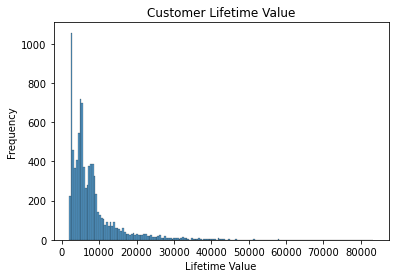

'\nInterpretation:\n- Almost certainly no normal distribution (although not statistically tested)\n'

In [9]:
# 3.1 Check normality/normal distribution of the different numerical columns
# a) customer_lifetime_value

sns.histplot(df['customer_lifetime_value'])
plt.xlabel('Lifetime Value')
plt.ylabel('Frequency')
plt.title('Customer Lifetime Value')

plt.show()

'''
Interpretation:
- Almost certainly no normal distribution (although not statistically tested)
'''

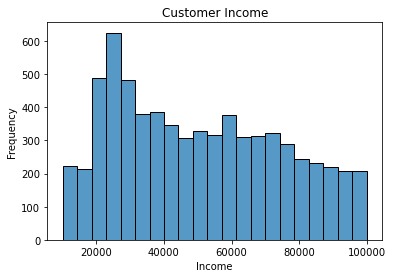

'\nInterpretation:\n- Normal distribtution could be given; only a statistic test can identify the distribution of the data\n'

In [10]:
# b) income
#Attention: 0 values; need to be transformed before generating the plot 
df['income'].replace(0, np.nan, inplace=True)

sns.histplot(df['income'])
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Customer Income')

plt.show()

'''
Interpretation:
- Normal distribtution could be given; only a statistic test can identify the distribution of the data
'''

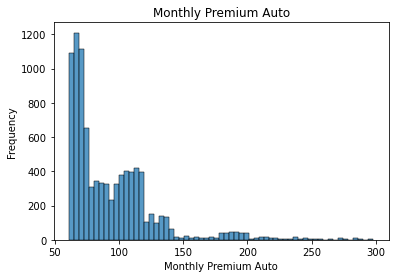

'\nInterpretation:\n- Almost certainly no normal distribution (although not statistically tested)\n'

In [11]:
# c) monthly_premium_auto

sns.histplot(df['monthly_premium_auto'])
plt.xlabel('Monthly Premium Auto')
plt.ylabel('Frequency')
plt.title('Monthly Premium Auto')

plt.show()

'''
Interpretation:
- Almost certainly no normal distribution (although not statistically tested)
'''

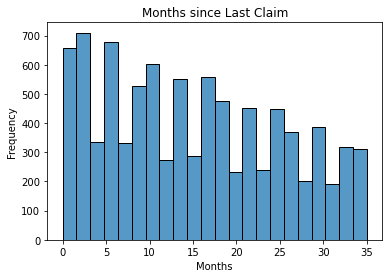

'\nInterpretation:\n- Normal distribtution could be given; only a statistic test can identify the distribution of the data\n'

In [12]:
# d) months_since_last_claim

sns.histplot(df['months_since_last_claim'])
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title('Months since Last Claim')

plt.show()

'''
Interpretation:
- Normal distribtution could be given; only a statistic test can identify the distribution of the data
'''

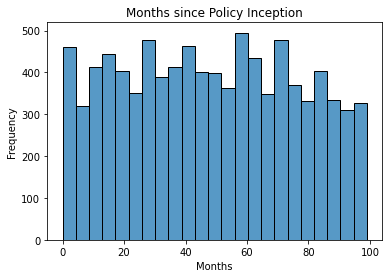

'\nInterpretation:\n- Normal distribtution could be given; only a statistic test can identify the distribution of the data\n'

In [13]:
# e) months_since_policy_inception

sns.histplot(df['months_since_policy_inception'])
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title('Months since Policy Inception')

plt.show()

'''
Interpretation:
- Normal distribtution could be given; only a statistic test can identify the distribution of the data
'''

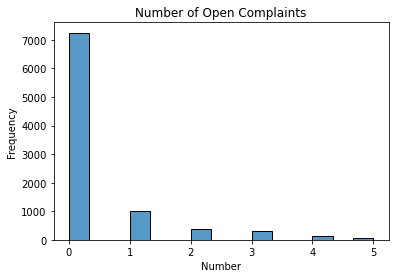

'\nInterpretation:\n- Almost certainly no normal distribution (although not statistically tested)\n'

In [14]:
# f) number_of_open_complaints

sns.histplot(df['number_of_open_complaints'])
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Number of Open Complaints')

plt.show()

'''
Interpretation:
- Almost certainly no normal distribution (although not statistically tested)
'''

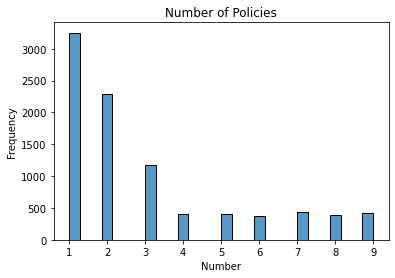

'\nInterpretation:\n- Almost certainly no normal distribution (although not statistically tested)\n'

In [15]:
# g)number_of_policies

sns.histplot(df['number_of_policies'])
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Number of Policies')

plt.show()

'''
Interpretation:
- Almost certainly no normal distribution (although not statistically tested)
'''

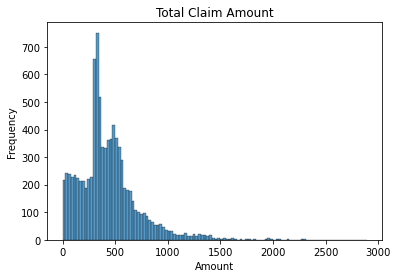

'\nInterpretation:\n- Normal distribtution could be given; only a statistic test can identify the distribution of the data\n'

In [16]:
# h) total_claim_amount

sns.histplot(df['total_claim_amount'])
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Total Claim Amount')

plt.show()

'''
Interpretation:
- Normal distribtution could be given; only a statistic test can identify the distribution of the data
'''

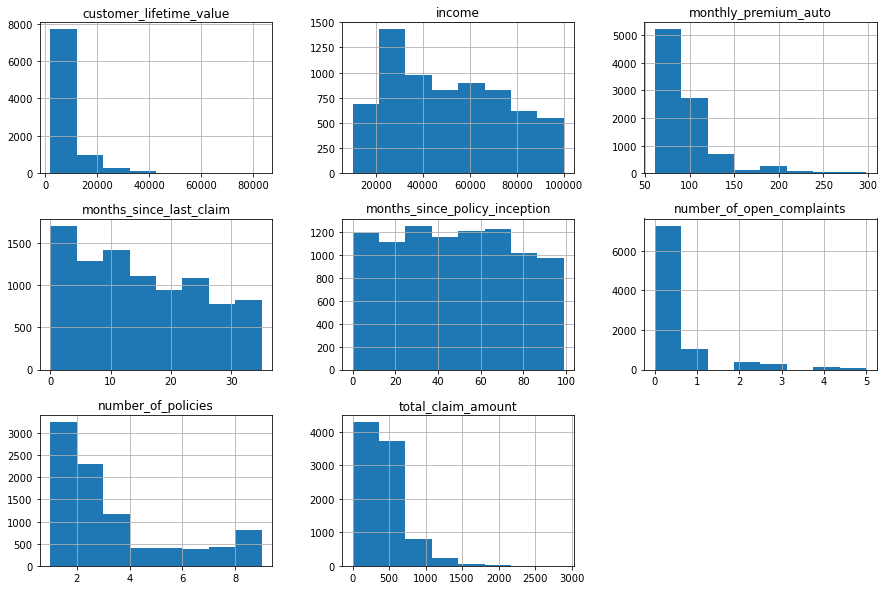

In [19]:
# Function to see all plots at once
df.hist(bins=8, figsize=(15, 10))
plt.show()

In [18]:
# 3.2 Assessing multicollinearity between the features with 'total_claim_amount'
# First, create new df with just the numerical columns

df_numeric =  df.select_dtypes('number')
df_numeric

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274.0,69,32,5,0,1,384.811147
1,6979.535903,NaN,94,13,42,0,8,1131.464935
2,12887.431650,48767.0,108,18,38,0,2,566.472247
3,7645.861827,NaN,106,18,65,0,7,529.881344
4,2813.692575,43836.0,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941.0,73,18,89,0,2,198.234764
9130,3096.511217,21604.0,79,14,28,0,1,379.200000
9131,8163.890428,NaN,85,9,37,3,2,790.784983
9132,7524.442436,21941.0,96,34,3,0,3,691.200000


In [24]:
df_corr = df_numeric.corr()
df_corr

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.002915,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.002915,1.000000,-0.012372,-0.034453,0.015799,0.016642,-0.001324,-0.221879
monthly_premium_auto,0.396262,-0.012372,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.034453,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,0.015799,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.016642,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.001324,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.221879,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


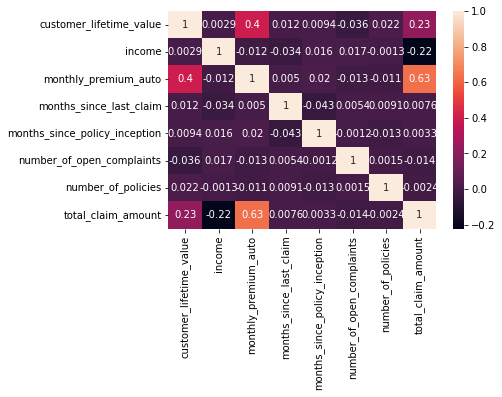

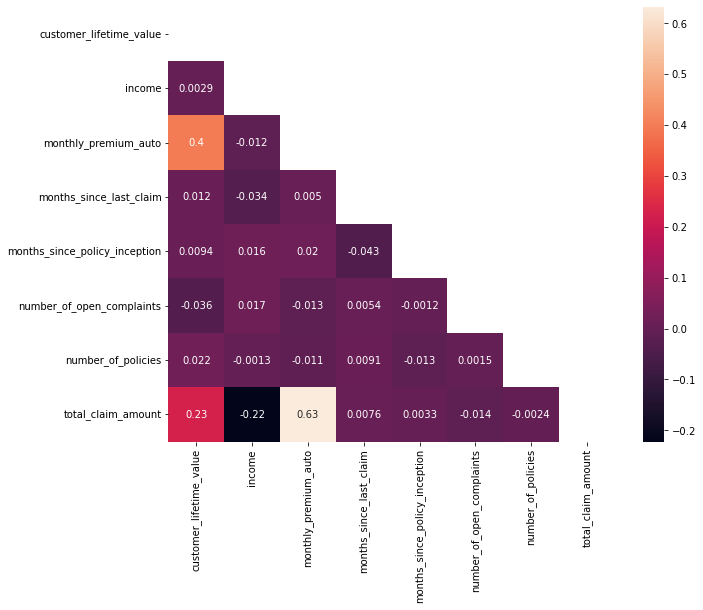

In [73]:
# 3.2 Assessing multicollinearity between the features with 'total_claim_amount'

sns.heatmap(df_corr, annot=True)
plt.show()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_corr, mask=mask, annot=True)
plt.show()


In [74]:
'''
Interpretation:
- 'monthly_premium_auto' has a high correlation with the 'total_claim_amount'
- Both 'customer_lifetime_value' and 'income' have a low to moderate correlation with 'total_claim_amount'
- There seems to be multicollinearity between 'monthly_premium_auto' and 'customer_lifetime_value'
--> Dropping 'customer_lifetime_value'
'''

''

In [26]:
# 3.3 Dropping 'customer_lifetime_value'

df_corr = df_corr.drop(['customer_lifetime_value'], axis = 1)
df_corr

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,0.002915,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,1.000000,-0.012372,-0.034453,0.015799,0.016642,-0.001324,-0.221879
monthly_premium_auto,-0.012372,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,-0.034453,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.015799,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,0.016642,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,-0.001324,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,-0.221879,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


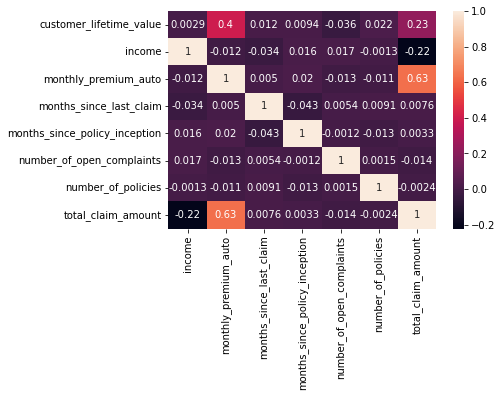

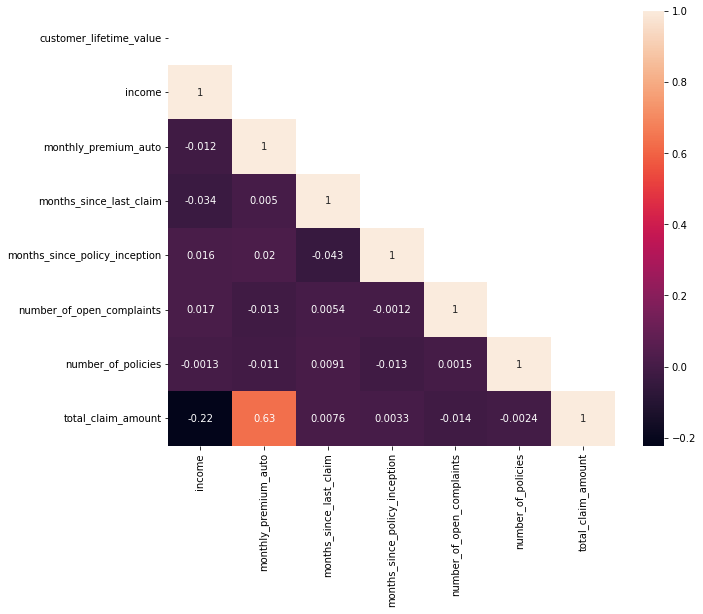

In [27]:
sns.heatmap(df_corr, annot=True)
plt.show()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_corr, mask=mask, annot=True)
plt.show()
